In [35]:
from konlpy.tag import Okt
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rc('axes', unicode_minus=False)
import pickle

In [2]:
df = pd.read_csv('./전세사기 세부내용_네이버지식인.csv')
print(df.shape)
df.head()

(313, 6)


,Unnamed: 0,제목,조회수,날짜,질문,응답
0,0,전세사기 개인회생 신청알아보고 잇어요,3006,2024.07.10,"전세사기를 당했어요.,인터넷카페 들어가보니. 상황이 좋지않은분들은 개인회생을 신청하...",안녕하세요. 로시컴-네이버 지식iN 상담변호사 김희성 입니다.​​저희 법무법...
1,1,전세사기 개인회생 신청알아보고 잇어요,3006,2024.07.10,"전세사기를 당했어요.,인터넷카페 들어가보니. 상황이 좋지않은분들은 개인회생을 신청하...",안녕하세요. 서울지방변호사회 소속으로 지식iN 법률상담을 진행하고 있는 최홍...
2,2,전세사기 개인회생 신청알아보고 잇어요,3006,2024.07.10,"전세사기를 당했어요.,인터넷카페 들어가보니. 상황이 좋지않은분들은 개인회생을 신청하...",안녕하세요. 서울지방변호사회 소속으로 지식iN 법률상담을 진행하고 있는 박진...
3,3,전세사기 개인회생 신청알아보고 잇어요,3006,2024.07.10,"전세사기를 당했어요.,인터넷카페 들어가보니. 상황이 좋지않은분들은 개인회생을 신청하...",안녕하세요. 서울지방변호사회 소속으로 지식iN 법률상담을 진행하고 있는 유혜...
4,4,전세사기 개인회생 신청알아보고 잇어요,3006,2024.07.10,"전세사기를 당했어요.,인터넷카페 들어가보니. 상황이 좋지않은분들은 개인회생을 신청하...",안녕하세요. 서울지방변호사회 소속으로 지식iN 법률상담을 진행하고 있는 추은...


In [3]:
sorce_txt = ' '.join(df['질문'].drop_duplicates())

In [4]:
# 1. 명사, 형용사, 동사 추출
okt = Okt()
n_a_v = [w for w, p in okt.pos(sorce_txt, stem=True) if p in ['Noun','Adjective','Verb']]

In [5]:
# 2. stop word 만들기 - n_a_v를 txt파일로 만들기 -> 메모장 열어서 불용어만 남긴다
n_a_v_1 = list(set(n_a_v))
with open('stop_word.txt', 'w') as f:
    for i in n_a_v_1:
        f.write(f'{i}\n')

In [6]:
len(n_a_v_1)

1284

In [30]:
# 3. stop_word.txt를 불러오자 -> 리스트
with open('./stop_word.txt','r') as f:
    stop_word = [i.strip() for i in list(f)]

In [31]:
# 4. n_a_v에서 불용어 삭제
res_txt = [i for i in n_a_v if i not in stop_word]
# 불용어가 제대로 삭제되었는지 확인하는 과정
res_txt.count('전세사기')

0

In [32]:
txt = ' '.join(res_txt)

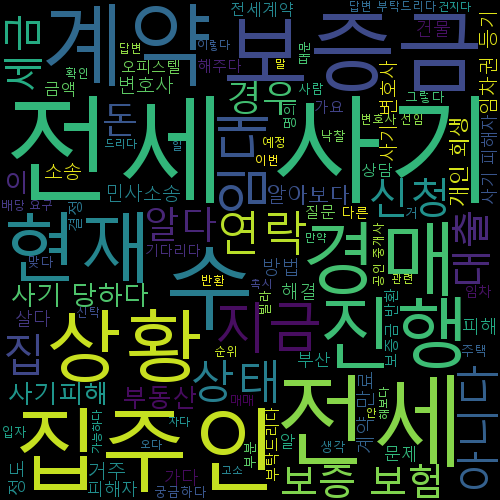

In [33]:
wc=WordCloud(font_path="C:/windows/fonts/malgun.ttf",
            background_color='black',
            width=500,
            height=500,
            max_words=100,
            max_font_size=200)
            #stopwords = stopwords)
wc=wc.generate(txt)
wc.to_image()

In [36]:
with open('최종 전처리 텍스트.pickle', 'wb') as f:
    pickle.dump(res_txt, f, pickle.HIGHEST_PROTOCOL)